# 3 Bifurcations
---

**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
    - [Graphical Conventions](#Graphical-Conventions)
    - [Terminology](#Terminology)
    - [Exmaple 3.1.1](#Exmaple-3.1.1)
    - [Normal Forms](#Normal-Forms)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
    - [Example 3.2.1](#Example-3.2.1)
    - [Example 3.2.2](#Example-3.2.2)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
    - [Physical Background](#Physical-Background)
    - [Model](#Model)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
    - [Supercritical Pitchfork Bifurcation](#Supercritical Pitchfork Bifurcation)
    - [Exmaple 3.4.1](#Exmaple-3.4.1)
    - [Example 3.4.2](#Example-3.4.2)
    - [Subcritical Pitchfork Bifurcation](#Subcritical-Pitchfork-Bifurcation)
    - [Terminology](#Terminology)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
    - [Analysis of the First-Order System](#Analysis-of-the-First-Order-System)
    - [Dimensional Analysis and Scaling](#Dimensional-Analysis-and-Scaling)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

## 3.0 Introduction
---

- **Bifuractions**

## 3.1 Saddle-Node Bifurcation
---

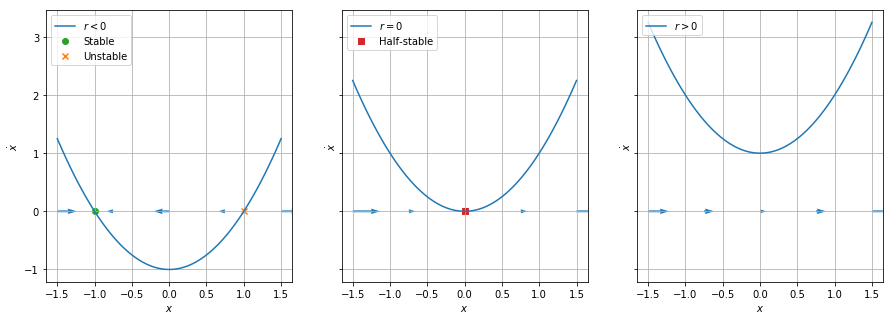

In [3]:
def f(x, r):
    y = r + x**2
    return y

x = np.linspace(-1.5, 1.5, 100)
x_flow = np.linspace(-1.5, 1.5, 5)

fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

labels = np.array([r'$r<0$', r'$r=0$', r'$r>0$'])
rs = np.array([-1, 0, 1])

for ax, label, r in zip(axes, labels, rs):
    ax.plot(x, f(x, r), label=label)
    ax.quiver(x_flow, 0, f(x_flow, r), 0, color=c[0])
    ax.set(xlabel=r'$x$', ylabel=r'$\dot{x}$')
    ax.grid(True)
    
    if r < 0:
        ax.scatter(- np.sqrt(- r), f(-np.sqrt(- r), r), label='Stable', c=c[2], marker=m[0])
        ax.scatter(np.sqrt(- r), f(-np.sqrt(- r), r), label='Unstable', c=c[1], marker=m[1])
    elif r == 0:
        ax.scatter(0, f(0, 0), label='Half-stable', c=c[3], marker=m[2])
        
    ax.legend(loc='upper left')
    
    
plt.show()

### Graphical Conventions

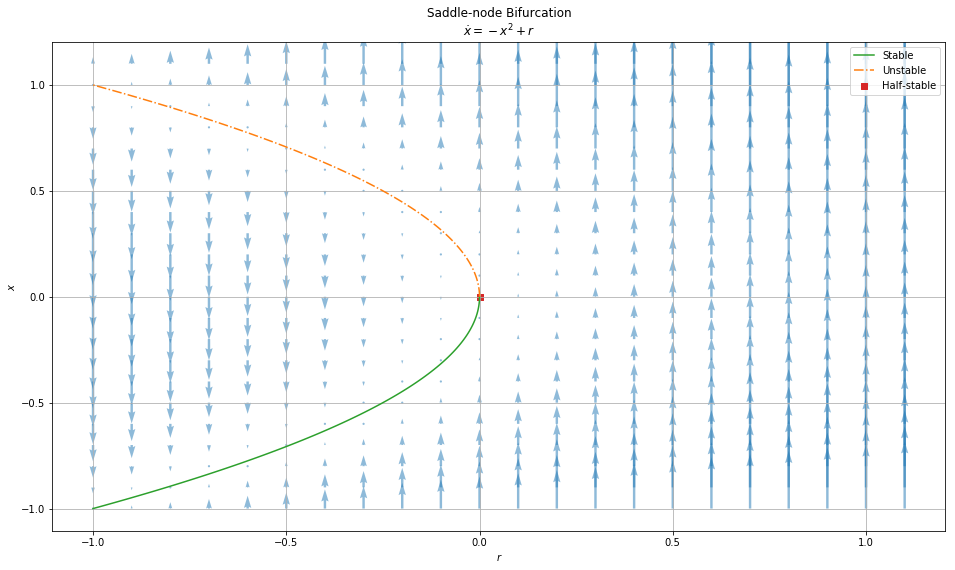

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, r):
    y = - x**2 + r
    return y

def g(x, r):
    y = x**2 + r
    return y

plt.figure(figsize=(16, 9))

x = np.linspace(-1, 0, 100)
y = f(x, 0)
plt.plot(y, x, label='Stable', c=c[2])

x = np.linspace(0, 1, 100)
y = f(x, 0)
plt.plot(y, x, label='Unstable', linestyle=l[2], c=c[1])

X, Y = np.meshgrid(np.arange(-1, 1.2, 0.1), np.arange(-1, 1.2, 0.1))
# U, V = np.meshgrid(X, Y)
plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), g(X, Y), alpha=.5, color=c[0])

plt.scatter(0, 0, marker='s', label='Half-stable', color=c[3])

plt.title('Saddle-node Bifurcation\n' r'$\dot{x} = - x^2 + r$')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.legend(loc='best')
plt.grid(True)

plt.show()

### Terminology

Saddle-node bifurcation 
aka, **Fold bifurcation**, **Tuning-point bifurcation**, **Blue sky bifurcation**

### Exmaple 3.1.1

linear stability analysis of fixed point: $\dot{x} = f(x) = r - x^2$

### Example 3.1.2

$$\dot{x} = r - x - e^{-x}$$

**Solution:**


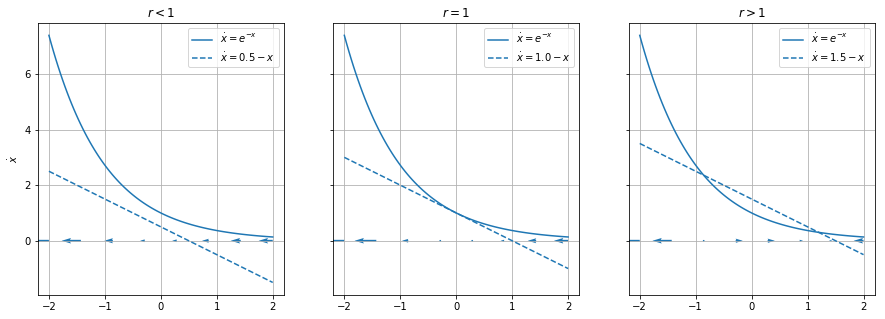

In [6]:
def f_1(x):
    y = np.exp(-x)
    return y

def f_2(x, r):
    y = r - x
    return y

def f(x, r):
    x_ = f_2(x, r) - f_1(x)
    return x_

rs = np.linspace(0.5, 1.5, 3)
x = np.linspace(-2, 2, 100)
x_flow = np.linspace(-2, 2, 8)
titles = np.array([r'$r < 1$', r'$r = 1$', r'$r > 1$'])

# fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True)
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

for ax, r, title in zip(axes, rs, titles):
    ax.plot(x, f_1(x), label=r'$\dot{x} = e^{-x}$', c=c[0])
    ax.plot(x, f_2(x, r), label = (r'$\dot{x} = %.1f - x$' % r), linestyle=l[1], c=c[0])
    ax.quiver(x_flow, 0, f(x_flow, r), 0, color=c[0])
    ax.legend(loc='upper right')
    ax.set(title=title)
    ax.grid(True)

axes[0].set(ylabel=r'$\dot{x}$')
# axes[1].title(r'$\dot{x} = r - x - e^{-x}$')
plt.show()

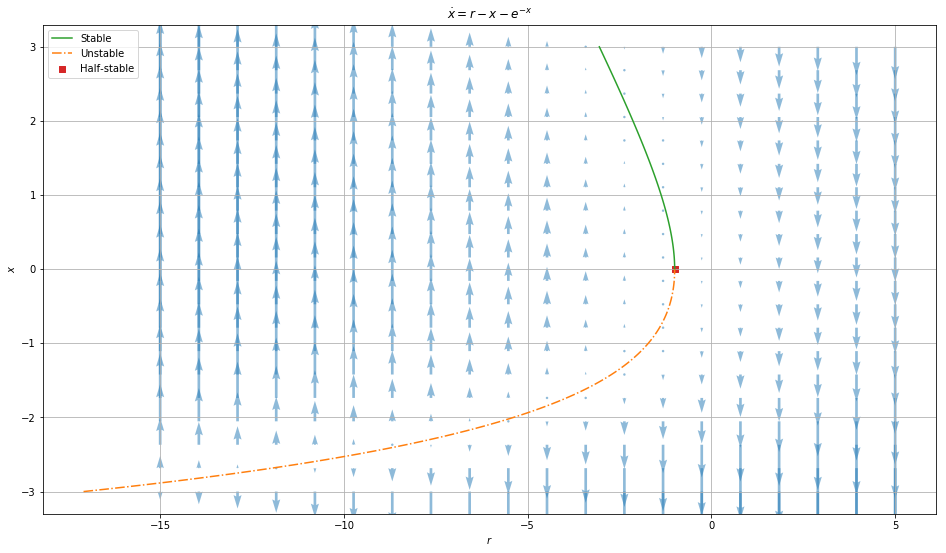

In [75]:
def f_1(x):
    y = np.exp(-x)
    return y

def f_2(x, r):
    y = r - x
    return y

def f(x, r):
    x_ = f_2(x, r) - f_1(x)
    return x_

plt.figure(figsize=(16, 9))

x = np.linspace(0, 3, 100)
plt.plot(f(x, 0), x, label='Stable', c=c[2], linestyle=l[0])
x = np.linspace(-3, 0, 100)
plt.plot(f(x, 0), x, label='Unstable', c=c[1], linestyle=l[2])
plt.scatter(f(0, 0), 0, label='Half-stable', c=c[3], marker=m[2])

x, r = np.linspace(-3, 3, 20), np.linspace(-5, 15, 20)
x, r = np.meshgrid(x, r)
plt.quiver(-r, x, 0, f(x, r), color=c[0], alpha=.5)

plt.title(r'$\dot{x} = r - x - e^{-x}$')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Normal Forms

$$\begin{align*}
\dot{x} 
&= r - x - e^{-x} \\
&= r - x - [1 - x + \frac{x^2}{2!} + \cdots] \\
&= (r - 1) - \frac{x^2}{2} + \cdots 
\end{align*}$$

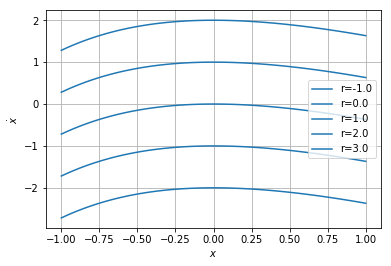

In [7]:
def f(x, r):
    y = r - x - np.exp(-x)
    return y

x = np.linspace(-1, 1, 100)
rs = np.linspace(-1, 3, 5)

for r in zip(rs):
    plt.plot(x, f(x, r), label=('r=%.1f' % r), c=c[0])
    #plt.scatter()

plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.legend(loc='best')
plt.show()

## 3.2 Transcritical Bifurcation
---

$$\dot{x} = rx - x^2$$
(1)


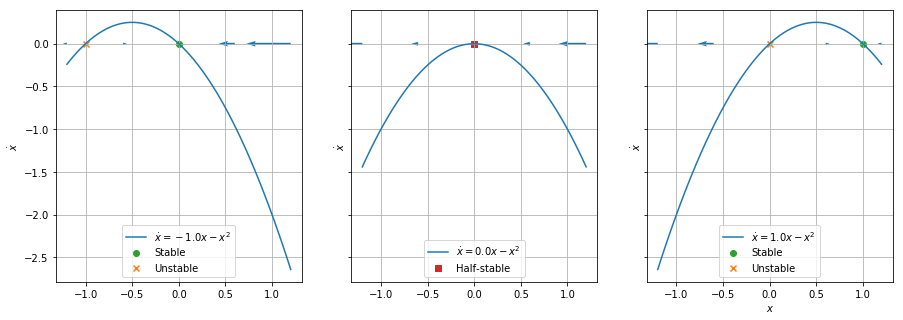

In [20]:
def f(x, r):
    y = r*x - x**2
    return y

x = np.linspace(-1.2, 1.2, 100)
rs = np.linspace(-1, 1, 3)
x_flow = np.linspace(-1.2, 1.2, 5)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, r in zip(axes, rs):
    ax.plot(x, f(x, r), label=(r'$\dot{x} = %.1f x - x^2$' % r))
    ax.quiver(x_flow, 0, f(x_flow, r), 0, color=c[0])
    if r > 0:
        ax.scatter(r, 0, label='Stable', c=c[2], marker=m[0])
        ax.scatter(0, 0, label='Unstable', c=c[1], marker=m[1])
    if r < 0:
        ax.scatter(0, 0, label='Stable', c=c[2], marker=m[0])
        ax.scatter(r, 0, label='Unstable', c=c[1], marker=m[1])
        
    if r == 0:
        ax.scatter(0, 0, label='Half-stable', c=c[3], marker=m[2])
            
    ax.set(ylabel=r'$\dot{x}$')
    ax.grid(True)
    ax.legend(loc='lower center')
    
axes[2].set(xlabel=r'$x$')
plt.show()

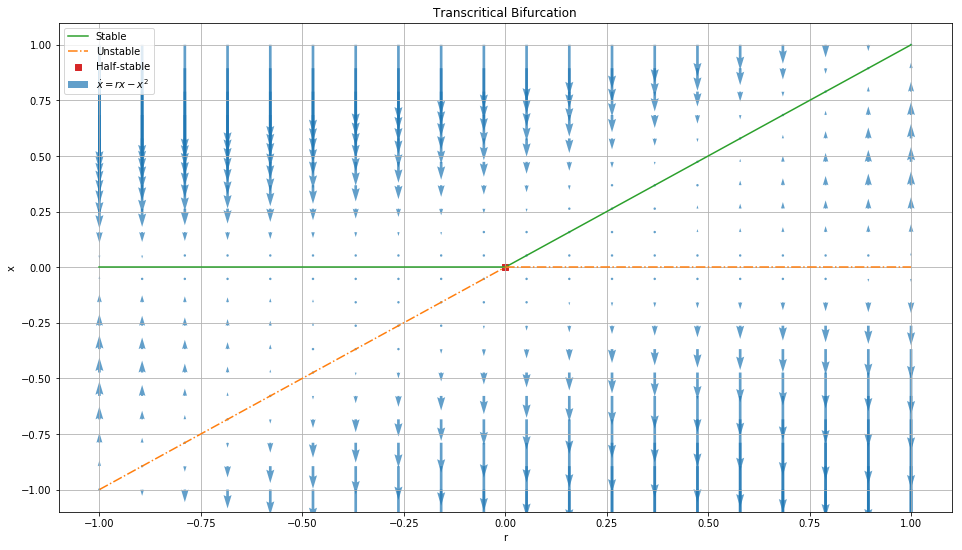

In [76]:
def stable(r):
    if r < 0:
        x = 0
    elif r >= 0:
        x = r
        
    return x

def unstable(r):
    if r < 0:
        x = r
    elif r >= 0:
        x = 0
    return x

def f(r):
    x = r
    return x
def g(r):
    x = 0
    return x

def F(x, r):
    y = r*x - x**2
    return y
    

r_neg = np.linspace(-1, 0, 100)
r_pos = np.linspace(0, 1, 100)

plt.figure(figsize=(16, 9))

# plt.plot(r, stable(r), linestyle=l[0], c=c[2], label='Stable')
# plt.plot(r, unstable(r), linestyle=l[2], c=c[1], label='Unstable')

plt.plot(r_neg, np.repeat(0, len(r_neg)), linestyle=l[0], c=c[2])
plt.plot(r_neg, f(r_neg), linestyle=l[2], c=c[1])

plt.plot(r_pos, f(r_pos), linestyle=l[0], c=c[2], label='Stable')
plt.plot(r_pos, np.repeat(0, len(r_pos)), linestyle=l[2], c=c[1], label='Unstable')

plt.scatter(0, 0, c=c[3], marker=m[2], label='Half-stable')

x, r = np.linspace(-1, 1, 20), np.linspace(-1, 1, 20)
x, r = np.meshgrid(x, r)
plt.quiver(r, x, 0, F(x, r), color=c[0], alpha=.7, label=r'$\dot{x}=rx-x^2$')

plt.title('Transcritical Bifurcation')
plt.xlabel(r'r')
plt.ylabel(r'x')
plt.grid(True)
plt.legend(loc='best')

plt.show()

### Example 3.2.1

$$\dot{x} = x(1-x^2) - a(1-e^{-bx})$$

**Solution:**

for small x $dx$
$$
\begin{align*}
1 - e^{-bx} 
&= 1 - [1 - bx + \frac{1}{2}b^2x^2 + O(x^3)] \\
&= bx - \frac{1}{2} b^2x^2 + O(x^3)
\end{align*}
$$

substitute: $1 - e^{-bx}$
$$
\begin{align*}
\dot{x}
&= x - a(bx - \frac{1}{2}b^2x^2) + O(x^3) \\
&= (1 - ab)x + (\frac{1}{2}ab^2) x^2 + O(x^3)
\end{align*}
$$

fixed point $x*$:
$$x* \approx \frac{2(ab -1)}{ab^2}$$

### Example 3.2.2

Analyze: 
$$\dot{x} = r \ln x + x -1$$ 
near $x=1$

find $X$, $R$, approximate form 
$$\dot{X} \approx RX - X^2$$

**Solution:**

fixe point: $x=1$ 

introduce new var: $u = x -1$

$$
\begin{align*}
\dot{u} 
&= \dot{x} \\
&= r \ln (1+u) + u \\
&= r \Big[ u - \frac{1}{2}u^2 + O(u^3) \Big] + u \\
&\approx (r + 1) u - \frac{1}{2}ru^2 + O(u^3) 
\end{align*}
$$

Let $u = av$

$$\dot{v} = (r+1)v - (\frac{1}{2}ra)v^2 + O(v^3)$$

if choose $a = \frac{2}{r}$

$$\dot{v} = (r+1)v - v^2 + O(v^3)$$

Let $R = r+1$, $X = v$

$$X = v = \frac{u}{a} = \frac{1}{2} r(x-1)$$

## 3.3 Laser Threshold

### Physical Background

solid-state laser

### Model

$n(t)$: \# of photons 

$$\begin{align*}
\dot{n} 
&= \text{gain} - \text{loss} \\
&= Gn N - kn
\end{align*}$$

- $N(t)$: \# of excited atoms
- $G (>0)$: gain coef
- $k (>0)$: rate constant; 
- $\tau = \frac{1}{k}$: lifetime of photon in laser

$$N(t) = N_0 - \alpha n$$
- $\alpha$: rate at which atoms drop back to graund state

Substitute: 
$$
\begin{align*}
\dot{n} &= Gn(N_0 - \alpha n) - kn \\
&= (GN_0 - k) n - \alpha G n^2
\end{align*}
$$

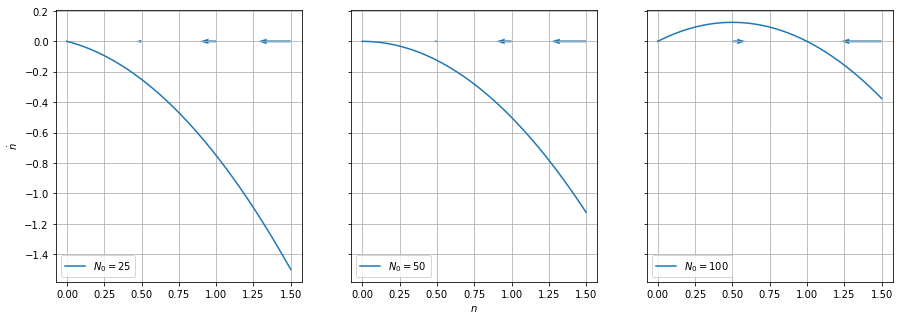

In [103]:
def f(n, N_0, G, k, alpha):
    n_ = (G * N_0 - k)* n - alpha * G * n**2
    # alpha*G* n * ((G*N_0 - k) / alpha*G - n)
    return n_

N_0s = np.array([25, 50, 100])
G = 0.01
k = 0.5
alpha = 50

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))
n = np.linspace(0, 1.5, 100)
n_flow = np.linspace(0, 1.5, 4)

for ax, N_0 in zip(axes, N_0s):
    n_dot = f(n, N_0, G, k, alpha)
    n_dot_flow = f(n_flow, N_0, G, k, alpha)
    
    ax.plot(n, n_dot, label=(r'$N_0 = %d $' % N_0))
    ax.quiver(n_flow, 0, n_dot_flow, 0, color=c[0])
    ax.legend(loc='lower left')
    ax.grid(True)
    
axes[0].set(ylabel=r'$\dot{n}$')
axes[1].set(xlabel=r'$n$')
plt.show()

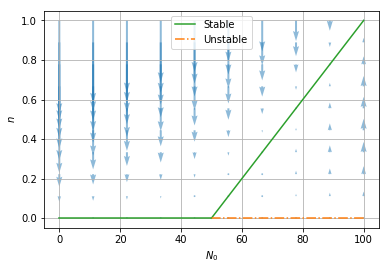

In [32]:
def f(n, N_0, G, k, alpha):
    n_ = (G * N_0 - k)* n - alpha * G * n**2
    # alpha*G* n * ((G*N_0 - k) / alpha*G - n)
    return n_

def stable(N_0, G, k, alpha):
    n = (G * N_0 - k) / (alpha * G)
    return n
    
G = 0.01
k = 0.5
alpha = 50


N_0 = np.linspace(50, 100, 10)
plt.plot(N_0, stable(N_0, G, k, alpha), label='Stable', c=c[2], linestyle=l[0])
plt.plot(N_0, np.repeat(0, len(N_0)), label='Unstable', c=c[1], linestyle=l[2])

N_0 = np.linspace(0, 50, 10)
plt.plot(N_0, np.repeat(0, len(N_0)), label='Stable', c=c[2], linestyle=l[0])

N_0, n = np.linspace(0, 100, 10), np.linspace(0, 1, 10)
N_0, n = np.meshgrid(N_0, n)
plt.quiver(N_0, n, 0, f(n, N_0, G, k, alpha), color=c[0], alpha=.5)



plt.xlabel(r'$N_0$')
plt.ylabel(r'$n$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## 3.4 Pitchfork Bifurcation
---

Pitchfork bifurcation:
- **Supercritical** bifurcation

### Supercritical Pitchfork Bifurcation

$$\dot{x} = rx - x^3$$
(1)

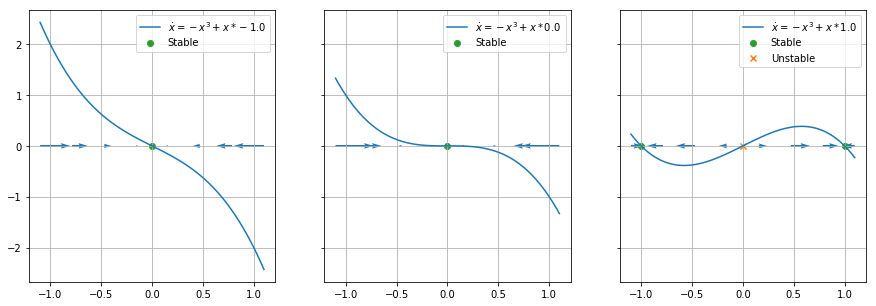

In [102]:
def f(x, r):
    y = - x**3 + x*r
    return y

x = np.linspace(-1.1, 1.1, 100)
x_flow = np.linspace(-1.1, 1.1, 8)
rs = np.array([-1, 0, 1])


fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(15, 5))

for ax, r in zip(axes, rs):
    ax.plot(x, f(x, r), label=(r'$\dot{x} = - x^3 + x * %.1f$' % r))
    ax.quiver(x_flow, 0, f(x_flow, r), 0, color=c[0])
    
    if r <= 0:
        ax.scatter(0, 0, c=c[2], marker=m[0], label='Stable')
    if r >  0:
        ax.scatter(np.sqrt(r), 0, c=c[2], marker=m[0], label='Stable')
        ax.scatter(- np.sqrt(r), 0, c=c[2], marker=m[0])
        ax.scatter(0, 0, c=c[1], marker=m[1], label='Unstable')
    
    ax.grid(True)
    ax.legend(loc='best')

plt.show()

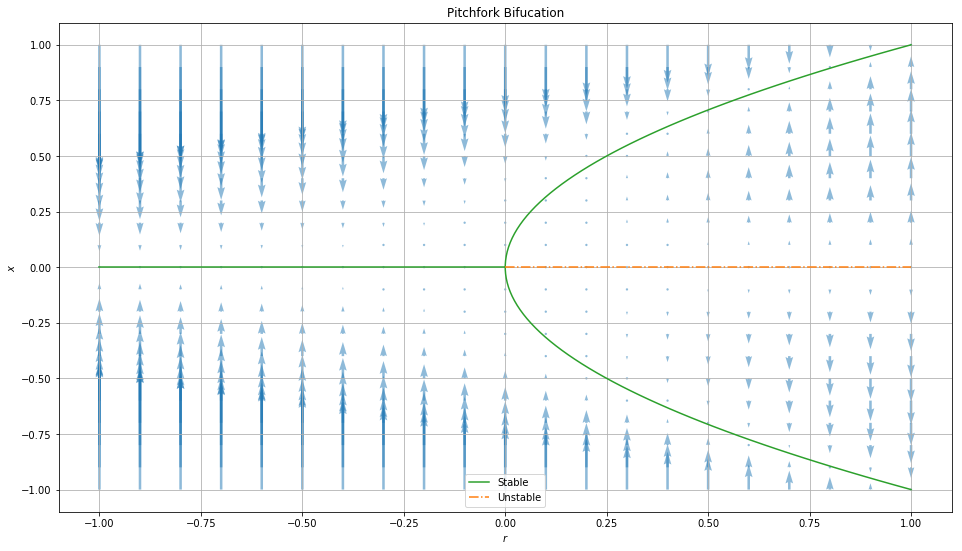

In [70]:
def f(x, r):
    y = - x**3 + x*r
    return y

# def fixed(x):
#     if x == 0:
#         r = 0
#     elif x != 0:
#         r = x**2
    
#     return r

plt.figure(figsize=(16, 9))

X, Y = np.meshgrid(np.arange(-1, 1.1, 0.1), np.arange(-1, 1.1, 0.1))

plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), f(X, Y), color=c[0], alpha=0.5)

x = np.linspace(-1, 1, 100)

plt.plot(x**2, x, label='Stable', c=c[2])

r = np.linspace(0, 1, 100)

plt.plot(-r, np.repeat(0, len(r)), label='Stable', color=c[2])
plt.plot(r, np.repeat(0, len(r)), label='Unstable', color=c[1], linestyle=l[2])

plt.title('Pitchfork Bifucation')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid(True)
plt.legend(loc='best')

plt.show()

### Exmaple 3.4.1

$$\dot{x} = - x + \beta \tanh x$$



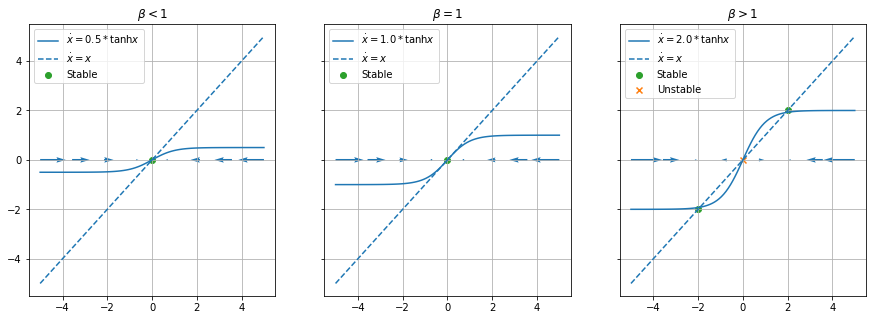

In [101]:
def f_1(x, beta):
    y = beta * np.tanh(x)
    return y

def f_2(x):
    y = x
    return y

def f(x, beta):
    y = f_1(x, beta)- f_2(x)
    return y

x = np.linspace(-5, 5, 100)
flow = np.linspace(-5, 5, 8)
betas = np.array([0.5, 1, 2])
labels = np.array([r'$\beta<1$', r'$\beta=1$', r'$\beta>1$'])
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, beta, label in zip(axes, betas, labels):
    ax.plot(x, f_1(x, beta), label=(r'$\dot{x}=%.1f * \tanh x$' % beta), c=c[0], linestyle=l[0])
    ax.plot(x, f_2(x), label=r'$\dot{x}=x$', c=c[0], linestyle=l[1])
    ax.quiver(flow, 0, f(flow, beta), 0, color=c[0])
    
    if beta <= 1:
        ax.scatter(0, 0, marker=m[0], c=c[2], label='Stable')
    elif beta > 1:
        ax.scatter(-2, -2, marker=m[0], c=c[2], label='Stable')
        ax.scatter(2, 2, marker=m[0], c=c[2])
        ax.scatter(0, 0, marker=m[1], c=c[1], label='Unstable')
    
    ax.legend(loc='best')
    ax.set(title=label)
    ax.grid(True)

# plt.plot(x, f(x, 2))


plt.show()

In [ ]:
def f_1(x, beta):
    y = beta * np.tanh(x)
    return y

def f_2(x):
    y = x
    return y

def f(x, beta):
    y = f_1(x, beta)- f_2(x)
    return y



### Example 3.4.2

Plot the potential $V(x)$
$$\dot{x} = rx - x^3$$
for cases r<0, r=0, r>0

*Solution:*

$f(x) := - \frac{dV}{dx}$
$$V(x) = -\frac{1}{2}rx^2 + \frac{1}{4}x^4$$

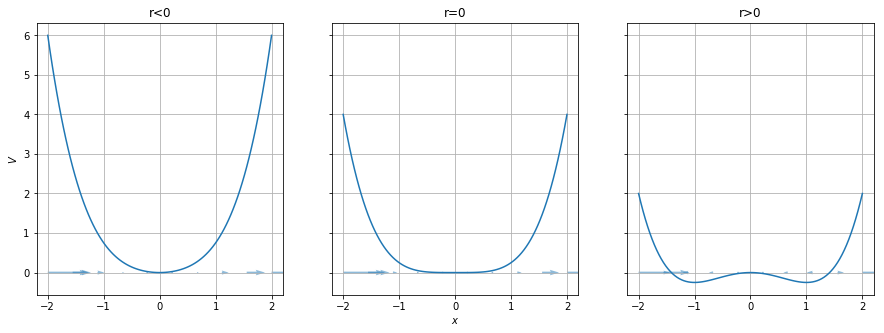

In [13]:
def V(x, r):
    V = - 1/2*r*x**2 + 1/4 * x**4
    return V

x = np.linspace(-2, 2, 100)
flow = np.linspace(-2, 2, 10)
rs = np.array([-1, 0, 1])
titles = np.array([r'r<0', r'r=0', r'r>0'])
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, r, title in zip(axes, rs, titles):
    ax.plot(x, V(x, r))
    ax.quiver(flow, 0, V(flow, r), 0, color=c[0], alpha=.5)
    ax.grid(True)
    ax.set(title=title)
    
axes[0].set(ylabel=r'$V$')
axes[1].set(xlabel=r'$x$')
plt.show()    

### Subcritical Pitchfork Bifurcation

- Supercritical
    - $\dot{x}=rx-x^3$
- **Subcritical**
    - $\dot{x}=rx+x^3$

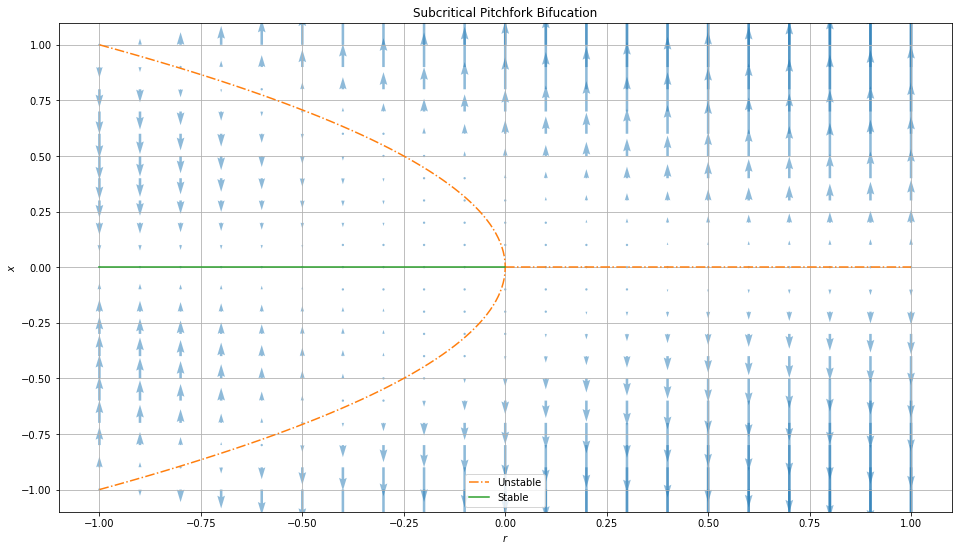

In [68]:
def f(x, r):
    x_ = x**3 + x*r
    return x_

# def fixed(x):
#     if x == 0:
#         r = 0
#     elif x != 0:
#         r = x**2
    
#     return r

plt.figure(figsize=(16, 9))

X, Y = np.meshgrid(np.arange(-1, 1.1, 0.1), np.arange(-1, 1.1, 0.1))
plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), f(X, Y), color=c[0], alpha=0.5)

x = np.linspace(-1, 1, 100)

plt.plot(-x**2, x, label='Unstable', c=c[1], linestyle=l[2])

r = np.linspace(0, 1, 100)

plt.plot(-r, np.repeat(0, len(r)), label='Stable', color=c[2])
plt.plot(r, np.repeat(0, len(r)), label='Unstable', color=c[1], linestyle=l[2])

plt.title('Subcritical Pitchfork Bifucation')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid(True)
plt.legend(loc='best')

plt.show()

$$\dot{x} = rx + x^3 - x^5$$
(3)

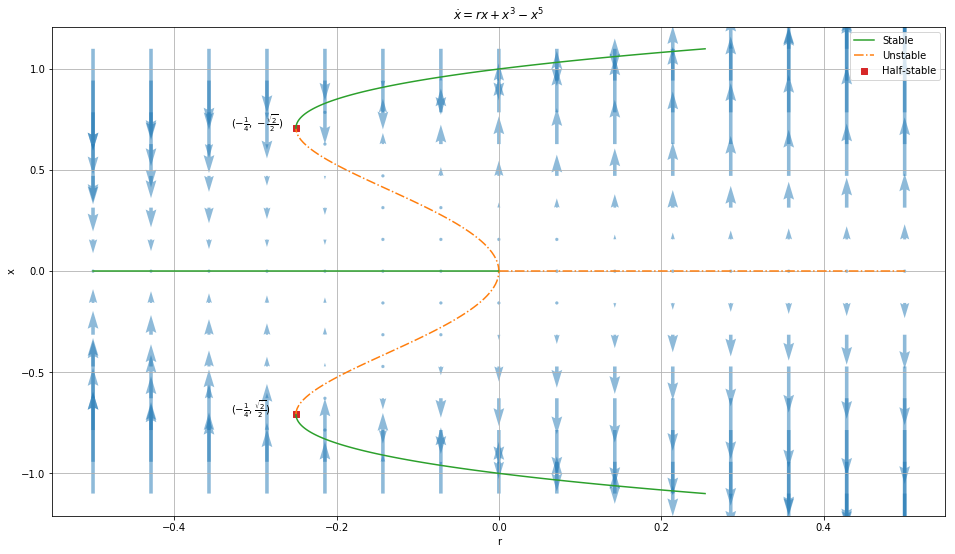

In [12]:
def f(x, r):
    x_ = r*x + x**3 - x**5
    return x_

def fixed(x):
    r = - x**2 + x**4
    return r
    
x_s = np.sqrt(0.5)
    
plt.figure(figsize=(16, 9))

x = np.linspace(-1.1, -x_s, 100)
plt.plot(fixed(x), x, c=c[2], linestyle=l[0])

x = np.linspace(-x_s, x_s, 100)
plt.plot(fixed(x), x, c=c[1], linestyle=l[2])

x = np.linspace(x_s, 1.1, 100)
plt.plot(fixed(x), x, c=c[2], linestyle=l[0])

r = np.linspace(-0.5, 0, 100)
plt.plot(r, np.repeat(0, len(r)), c=c[2], linestyle=l[0], label='Stable')

r = np.linspace(0, 0.5, 100)
plt.plot(r, np.repeat(0, len(r)), c=c[1], linestyle=l[2], label='Unstable')

plt.scatter(fixed(x_s), -x_s, c=c[3], marker=m[2], label='Half-stable')
plt.scatter(fixed(x_s), x_s, c=c[3], marker=m[2])
plt.text(fixed(-x_s) - 0.08, -x_s, r'$(- \frac{1}{4}, \frac{\sqrt{2}}{2})$')
plt.text(fixed(x_s) - 0.08, x_s, r'$(- \frac{1}{4}, - \frac{\sqrt{2}}{2})$')

x, r = np.meshgrid(np.linspace(-1.1, 1.1, 15), np.linspace(-0.5, 0.5, 15))
plt.quiver(r, x, 0, f(x, r), color=c[0], alpha=.5)

plt.title(r'$\dot{x} = rx + x^3 - x^5$')
plt.grid(True)
plt.xlabel(r'r')
plt.ylabel(r'x')
plt.legend(loc='best')
plt.show()

### Terminology

- Supercritial pitchfork
    - aka, **Forward** bifurcation
    - soft/safe
- Subcritical pitchfork
    - aka, **Backward** bifurcation
    - hard/dangerous

## 3.5 Overdamped Bead on a Rotating Hoop
---

Let 
- $\phi$: angle ($-\pi < \phi ≤ \pi$)
- $\rho := r \sin \phi$

$$$$

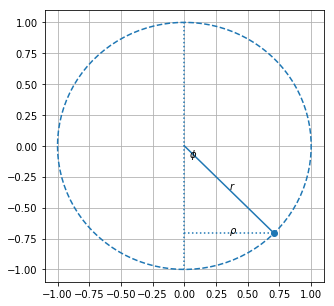

In [11]:
pi = np.pi
r = 1
phi_1 = pi/4

def cos(phi):
    y = np.cos(phi) * r
    return y
    
def sin(phi):
    y = np.sin(phi) * r
    return y

phi = np.linspace(-pi, pi, 100)
plt.figure(figsize=(5, 5))
plt.plot(cos(phi), sin(phi), linestyle=l[1])

plt.scatter(sin(phi_1), - cos(phi_1), c=c[0])

# r
plt.plot(np.array([0, sin(phi_1)]), np.array([0, -cos(phi_1)]), c=c[0])
plt.text(sin(phi_1)/2, - cos(phi_1)/2, r'$r$')

# rho
rho = sin(phi_1)
plt.plot(np.array([0, sin(phi_1)]), np.array([-cos(phi_1), -cos(phi_1)]), c=c[0], linestyle=l[3])
plt.text(sin(phi_1)/2, - cos(phi_1), r'$\rho$')

# vertical
plt.plot(np.array([0, 0]), np.array([r, -r]), linestyle=l[3], c=c[0])

plt.text(sin(phi_1/2)/10, - cos(phi_1/2)/10, r'$\phi$')

plt.grid(True)
plt.show()

$$mr\ddot{\phi} = - b\dot{\phi} - mg\sin \phi + mr\omega^2 \sin \phi \cos \phi$$
(1)

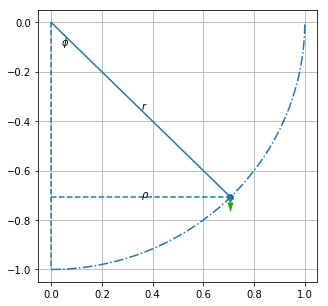

In [81]:
pi = np.pi
r = 1
phi = pi/4

def cos(theta):
    y = np.cos(theta) * r
    return y
    
def sin(theta):
    y = np.sin(theta) * r
    return y


theta = np.linspace(-pi/2, 0, 100)
plt.figure(figsize=(5, 5))
plt.plot(cos(theta), sin(theta), c=c[0], linestyle=l[2])

plt.scatter(sin(phi), - cos(phi), c=c[0])

# r
plt.plot(np.array([0, sin(phi)]), np.array([0, -cos(phi)]), c=c[0])
plt.text(sin(phi)/2, - cos(phi)/2, r'$r$')

# rho
rho = sin(phi)
plt.plot(np.array([0, sin(phi)]), np.array([-cos(phi), -cos(phi)]), c=c[0], linestyle=l[1])
plt.text(sin(phi)/2, - cos(phi), r'$\rho$')

# vertical
plt.plot(np.array([0, 0]), np.array([0, -r]), linestyle=l[1], c=c[0])
plt.text(sin(phi/2)/10, -cos(phi/2)/10, r'$\phi$')


# constant
m = 1
g = 9.8
omega = pi

plt.quiver(sin(phi), - cos(phi), 0, - m*g, color=c[2])

# plt.quiver()




plt.grid(True)



plt.show()

### Analysis of the First-Order System

$$
\begin{align*}
b \dot{\phi} 
&= - mg \sin \phi + mr\omega^2 \sin \phi \cos \phi \\
&= mg \sin \phi \Big( \frac{r\omega^2}{g} \cos \phi - 1 \Big)
\end{align*}
$$
(2)

$\sin \phi = 0$
$\phi* = 0, \pi$

if $\frac{r\omega^2}{g} > 1$

$$\phi* = ± \cos^{-1} \Big( \frac{g}{r\omega^2} \Big)$$

$$\gamma := \frac{r\omega^2}{g}$$

$$\cos \phi* = \frac{1}{\gamma}$$

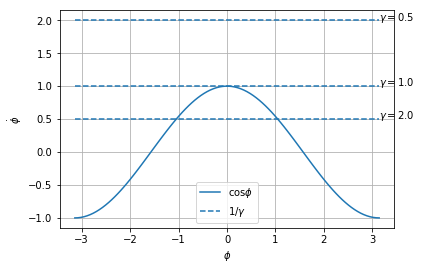

In [46]:
pi = np.pi
phi = np.linspace(-pi, pi, 100)

plt.plot(phi, np.cos(phi), label=r'$\cos \phi$')

gammas = np.array([0.5, 1, 2])

for gamma in gammas:
    plt.plot(phi, np.repeat(1/gamma, len(phi)), linestyle=l[1], c=c[0], label=r'$1/\gamma$')
    plt.text(pi, 1/gamma, (r'$\gamma = %.1f$' % gamma))

plt.xlabel(r'$\phi$')
plt.ylabel(r'$\dot{\phi}$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

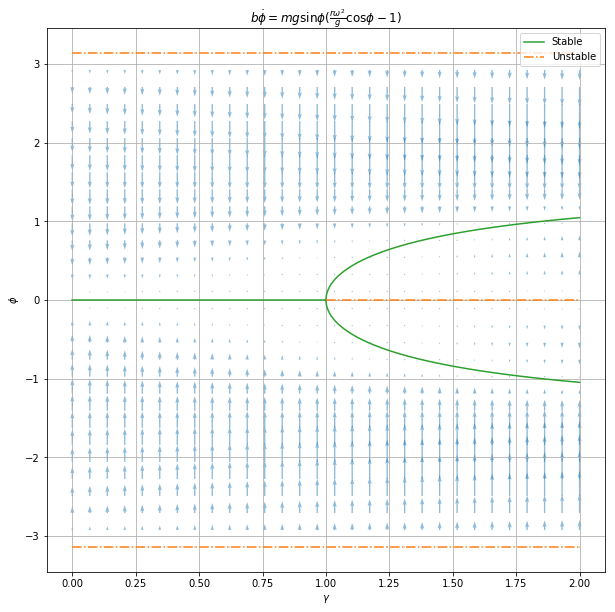

In [73]:
pi = np.pi

def f(phi, gamma):
    phi_ = np.sin(phi) * (gamma * np.cos(phi) - 1)
    return phi_

def fixed(phi):
    gamma = 1 / np.cos(phi)
    return gamma

phi = np.linspace(-pi/3, pi/3, 100)

plt.figure(figsize=(10, 10))

# Stable
plt.plot(fixed(phi), phi, c=c[2], linestyle=l[0], label='Stable')
plt.plot(np.array([0, 1]), np.array([0, 0]), c=c[2], linestyle=l[0])

# Unstable
plt.plot(np.linspace(0, fixed(pi/3), 10), np.repeat(pi, 10), c=c[1], linestyle=l[2], label='Unstable')
plt.plot(np.linspace(0, fixed(pi/3), 10), np.repeat(-pi, 10), c=c[1], linestyle=l[2])
plt.plot(np.linspace(1, fixed(pi/3), 10), np.repeat(0, 10), c=c[1], linestyle=l[2])

# vector
gamma, phi = np.meshgrid(np.linspace(0, 2, 30), np.linspace(-pi, pi, 30))
plt.quiver(gamma, phi, 0, f(phi, gamma), color=c[0], alpha=.5)

plt.title(r'$b \dot{\phi} = mg \sin \phi ( \frac{r\omega^2}{g} \cos \phi - 1)$')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\phi$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Dimensional Analysis and Scaling

**Dimensionless** form

dimentionless time $\tau$
$$\tau := \frac{t}{T}$$

$\frac{d\phi}{d\tau}$, $\frac{d^2\phi}{d\tau^2}$ $\approx O(1)$

- $T$: **Characteristic time scale**

$$\dot{\phi} = \frac{d\phi}{dt} = \frac{d\phi}{d\tau} \frac{d\tau}{dt} = \frac{1}{T} \frac{d\phi}{d\tau}$$

$$\ddot{\phi} = \frac{1}{T^2} \frac{d^2\phi}{d\tau^2}$$

substitute $T\tau$ for $t$
$$\frac{mr}{T^2} \frac{d^2\phi}{d\tau^2} = - \frac{b}{T} \frac{d\phi}{d\tau} - mg\sin\phi + mr\omega^2 \sin\phi\cos\phi$$

$1/mg$
$$
\begin{align*}
\Big( \frac{r}{gT^2} \Big) \frac{d^2\phi}{d\tau^2} = - \Big( \frac{b}{mgT} \Big) \frac{d\phi}{d\tau} - \sin\phi + \Big( \frac{r\omega^2}{g} \Big) \sin\phi\cos\phi
& \quad\quad \text{(3)}
\end{align*}
$$
(3)

$\frac{r\omega^2}{g}:= \gamma$

needed
$$\frac{b}{mgT} \approx O(1) \text{and} \frac{r}{gT^2} << 1$$

$T := \frac{b}{mg}$

$r/gT^2 << 1$ 

$$
\begin{align*}
\frac{r}{g} \Big( \frac{mg}{b} \Big)^2 << 1
& \quad\quad \text{(4)}
\end{align*}
$$

$$b^2 >> m^2gr$$


dumping is strong; mass is small 

$$
\begin{align*}
\epsilon := \frac{m^2gr}{b^2}
& \quad\quad \text{(5)}
\end{align*}
$$

(3) becomes
$$
\begin{align*}
\epsilon \frac{d^2\phi}{d\tau^2} = -  \frac{d\phi}{d\tau} - \sin\phi + \gamma \sin\phi\cos\phi
& \quad\quad \text{(6)}
\end{align*}
$$


$\epsilon \rightarrow 0$

$$
\begin{align*}
\frac{d\phi}{d\tau} &= f(\phi) \\
f(\phi) &:= -\sin\phi + \gamma \sin\phi\cos\phi \\
&= \sin\phi (\gamma\cos\phi - 1)
& \quad\quad \text{(7)}
\end{align*}
$$

### A Paradox

(7) first-order system valid in the overdamped limit / not?

### Phase Plane Analysis

**phase plane**

let 
$$\Omega = \phi' \equiv \frac{d\phi}{d\tau}$$

$(\phi(0), \Omega(0))$, $(\phi(\tau), \Omega(\tau))$

convert (6) into a vector field

$$
\epsilon\Omega' = f(\phi) - \Omega
$$

def $\phi' := \Omega$ yields the vector field

$$
\begin{align*}
\phi' &= \Omega 
& \quad\quad \text{(8a)} \\
\Omega' &= \frac{1}{\epsilon} (f(\phi) - \Omega)
& \quad\quad \text{(8b)}
\end{align*}
$$





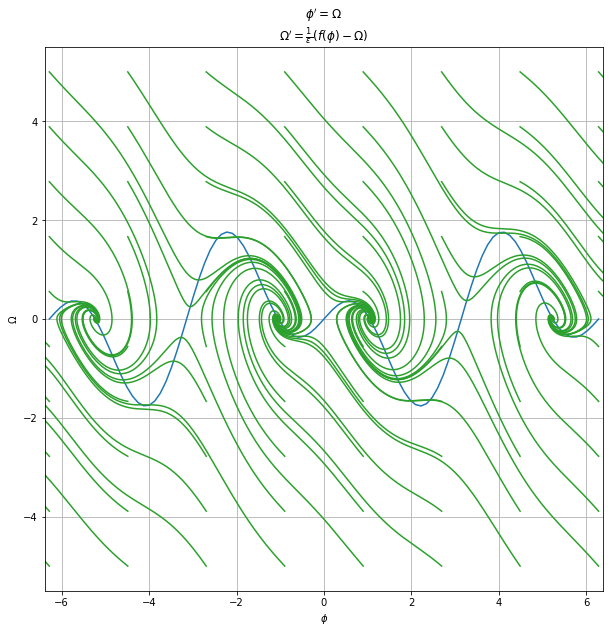

In [53]:
# constant
gamma = 2
epsilon = 1

def f(phi):
    y = np.sin(phi) * (gamma * np.cos(phi) - 1)
    return y

def phi_dot(phi, omega):
    phi_ = omega
    return phi_
    
def omega_dot(phi, omega):
    omega_ = 1/epsilon * (f(phi) - omega)
    return omega_

def slope(phi_0, omega_0, t_0, dt, ite):
    
    phi = np.array([phi_0])
    omega = np.array([omega_0])
    t = np.array([t_0])
    
    for i in range(ite):
        phi_i = phi[i]
        omega_i = omega[i]
        t_i = t[i]
        
        phi = np.append(phi, np.array([phi_i + phi_dot(phi_i, omega_i)/100]))
        omega = np.append(omega, np.array([omega_i + omega_dot(phi_i, omega_i)/100]))
        t = np.append(t, np.array([t_i+dt]))
    return phi, omega, t

plt.figure(figsize=(10, 10))

pi = np.pi
p = np.linspace(-pi*2, pi*2, 100)
plt.plot(p, f(p), c=c[0], linestyle=l[0], label=r'$f(\phi) - \Omega = 0$')

n_phi, n_omega = 8, 10
phi_0s, omega_0s = np.meshgrid(np.linspace(- pi*2, pi*2, n_phi), np.linspace(-5, 5, n_omega))

phi_0s = np.reshape(phi_0s, (n_phi*n_omega, 1))
omega_0s = np.reshape(omega_0s, (n_phi*n_omega, 1))

for phi_0, omega_0 in zip(phi_0s, omega_0s):
    phi, omega, t = slope(phi_0, omega_0, 0, 0.01, 1000)
    
    #plt.scatter(phi[1], omega[1], c=c[2], marker=m[0])
    plt.plot(phi, omega, linestyle=l[0], c=c[2])
    
# phi, omega, t = slope(pi/2, 1, 0, 0.01, 1000)
# plt.plot(phi, omega, linestyle=l[1], c=c[0])

plt.xlim(-pi*2-0.1, pi*2+0.1)
plt.ylim(-5.5, 5.5)

plt.title(r"$\phi' = \Omega$" "\n" r"$\Omega' = \frac{1}{\epsilon} (f(\phi) - \Omega)$")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\Omega$')
# plt.legend(loc='best')
plt.grid(True)
plt.show()

# print(phi_0s)
# print(np.shape(phi_0s))

## 3.6 Imperfect Bifurcation and Catastrophes
---

$$\dot{x} = h + rx + x^3$$

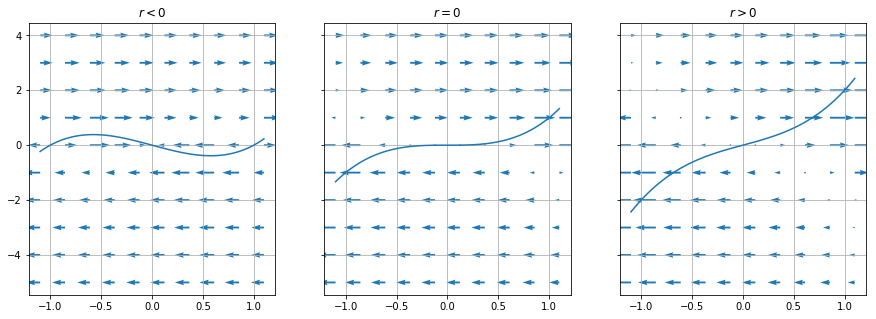

In [21]:
def f(x, r, h):
    x_ = h + r*x + x**3
    return x_

def fixed(x, r):
    h = - r*x - x**3
    return h

x = np.linspace(-1.1, 1.1, 100)
rs = np.array([-1, 0, 1])
# hs = np.array([-1, 0, 1])
hs = np.arange(-5, 5, 1)
titles = np.array([r'$r < 0$', r'$r = 0$', r'$r > 0$'])

flow = np.linspace(-1.1, 1.1, 10)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, r, title in zip(axes, rs, titles):
    ax.set(title=title)
    ax.plot(x, f(x, r, 0), c=c[0])
    for h in hs:
#         ax.plot(x, f(x, r, h), c=c[0])
        ax.quiver(flow, h, f(flow, r, h), 0, color=c[0])
        ax.grid(True)
    

plt.show()

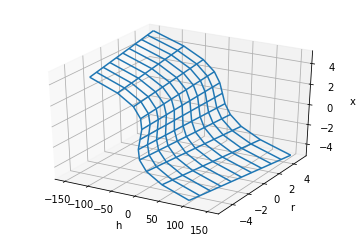

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fixed(x, r):
    h = - r*x - x**3
    return h

x, r = np.arange(-5, 5.01, 1), np.arange(-5, 5.01, 1)
x, r = np.meshgrid(x, r)
h = fixed(x, r)

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot_surface(h, r, x)
ax.plot_wireframe(h, r, x)

# Axes3D.plot_wireframe(X, Y, Z)

ax.set(xlabel='h', ylabel='r', zlabel='x')
plt.show()

# print(X)
# print(Y)
# print(Z)

---
**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
    - [Graphical Conventions](#Graphical-Conventions)
    - [Terminology](#Terminology)
    - [Exmaple 3.1.1](#Exmaple-3.1.1)
    - [Normal Forms](#Normal-Forms)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
    - [Example 3.2.1](#Example-3.2.1)
    - [Example 3.2.2](#Example-3.2.2)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
    - [Physical Background](#Physical-Background)
    - [Model](#Model)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
    - [Supercritical Pitchfork Bifurcation](#Supercritical Pitchfork Bifurcation)
    - [Exmaple 3.4.1](#Exmaple-3.4.1)
    - [Example 3.4.2](#Example-3.4.2)
    - [Subcritical Pitchfork Bifurcation](#Subcritical-Pitchfork-Bifurcation)
    - [Terminology](#Terminology)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
    - [Analysis of the First-Order System](#Analysis-of-the-First-Order-System)
    - [Dimensional Analysis and Scaling](#Dimensional-Analysis-and-Scaling)
    - [A Paradox](#A-Paradox)
    - [Phase Plane Analysis](#Phase-Plane-Analysis)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)